In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import correlate

In [2]:
week_df = pd.read_csv("../raw_data/1_week_RAW.csv")

week_df.head()

,datetime,x_D,y_D,z_D,x_ND,y_ND,z_ND
0,2017-05-04 00:00:00.000000,-0.949,0.035,0.273,-0.957,0.008,0.277
1,2017-05-04 00:00:00.012500,-0.953,0.027,0.273,-0.957,0.000,0.277
2,2017-05-04 00:00:00.025000,-0.953,0.027,0.266,-0.961,0.000,0.270
3,2017-05-04 00:00:00.037500,-0.949,0.023,0.266,-0.957,0.000,0.273
4,2017-05-04 00:00:00.050000,-0.949,0.023,0.270,-0.957,-0.004,0.273


In [3]:
week_df.shape

(41472000, 7)

In [4]:
week_df.isna().sum()

datetime    0
x_D         0
y_D         0
z_D         0
x_ND        0
y_ND        0
z_ND        0
dtype: int64

In [5]:
aha_df = pd.read_csv("../raw_data/1_AHA_RAW.csv")

aha_df.head(82)

,datetime,x_D,y_D,z_D,x_ND,y_ND,z_ND
0,2017-05-03 16:31:00.000000,-0.785,-0.086,-0.613,0.828,-0.051,0.531
1,2017-05-03 16:31:00.012500,-0.781,-0.090,-0.613,0.828,-0.059,0.531
2,2017-05-03 16:31:00.025000,-0.781,-0.090,-0.617,0.824,-0.055,0.527
3,2017-05-03 16:31:00.037500,-0.785,-0.090,-0.613,0.828,-0.055,0.531
4,2017-05-03 16:31:00.050000,-0.777,-0.094,-0.609,0.828,-0.059,0.527
...,...,...,...,...,...,...,...
77,2017-05-03 16:31:00.962500,-0.883,-0.090,-0.492,0.836,-0.066,0.547
78,2017-05-03 16:31:00.975000,-0.871,-0.090,-0.496,0.836,-0.066,0.543
79,2017-05-03 16:31:00.987500,-0.875,-0.082,-0.496,0.836,-0.066,0.535
80,2017-05-03 16:31:01.000000,-0.875,-0.082,-0.504,0.836,-0.059,0.531


In [6]:
aha_df.shape

(96000, 7)

In [7]:
aha_df.isna().sum()

datetime    0
x_D         0
y_D         0
z_D         0
x_ND        0
y_ND        0
z_ND        0
dtype: int64

- Data is collected every 12.5 ms   ==> There are 80 records for each second
- We have 96k records for AHA       ==> 20 minutes of data
- We have 41472k records for week   ==> 6 days of data

In [8]:
# convert datetime attribute to actual datetime
week_df['datetime'] = pd.to_datetime(week_df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
aha_df['datetime'] = pd.to_datetime(aha_df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [9]:
# we compute magnitude to make cross correlation
week_df['magnitude_D'] = np.sqrt(week_df['x_D']**2 + week_df['y_D']**2 + week_df['z_D']**2)
week_df['magnitude_ND'] = np.sqrt(week_df['x_ND']**2 + week_df['y_ND']**2 + week_df['z_ND']**2)
aha_df['magnitude_D'] = np.sqrt(aha_df['x_D']**2 + aha_df['y_D']**2 + aha_df['z_D']**2)
aha_df['magnitude_ND'] = np.sqrt(aha_df['x_ND']**2 + aha_df['y_ND']**2 + aha_df['z_ND']**2)

([<matplotlib.axis.XTick at 0x2952696ef10>,
 [Text(0, 0, '2017-05-04 00:00:00'),
  Text(40, 0, '2017-05-04 00:00:00.500000'),
  Text(80, 0, '2017-05-04 00:00:01'),
  Text(120, 0, '2017-05-04 00:00:01.500000'),
  Text(160, 0, '2017-05-04 00:00:02'),
  Text(200, 0, '2017-05-04 00:00:02.500000'),
  Text(240, 0, '2017-05-04 00:00:03'),
  Text(280, 0, '2017-05-04 00:00:03.500000'),
  Text(320, 0, '2017-05-04 00:00:04'),
  Text(360, 0, '2017-05-04 00:00:04.500000'),
  Text(400, 0, '2017-05-04 00:00:05')])

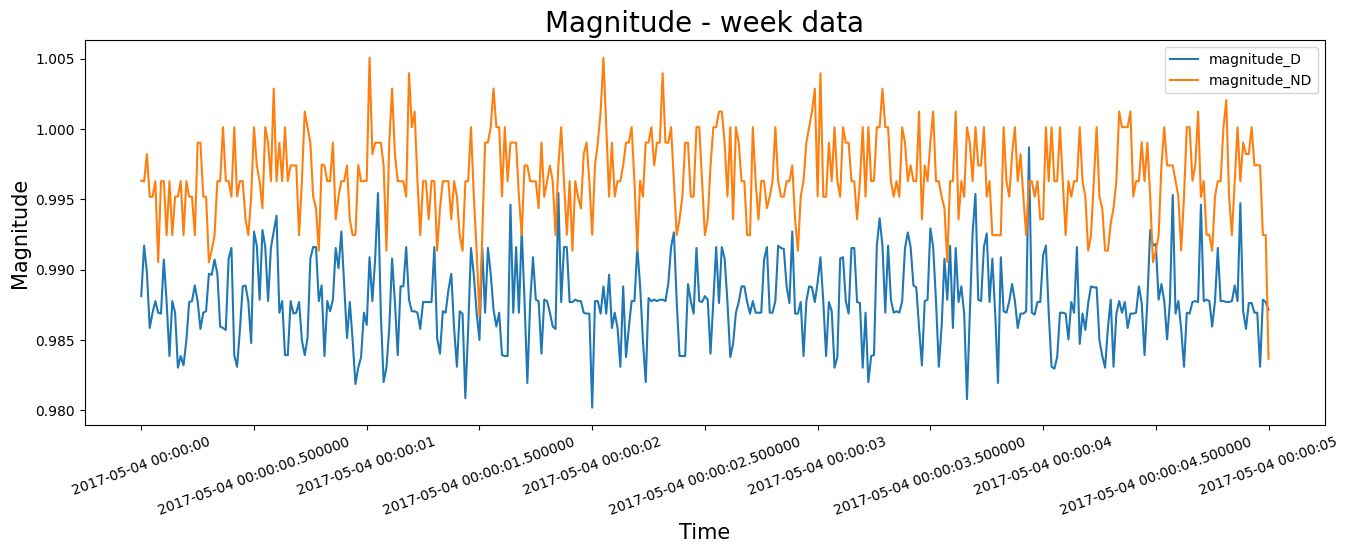

In [10]:
fig, axs = plt.subplots(figsize=(16, 5))

subsample = [0, 400]
week_subsample = week_df.loc[subsample[0] : subsample[1]]

plt.plot(week_subsample.index, week_subsample['magnitude_D'])
plt.plot(week_subsample.index, week_subsample['magnitude_ND'])
plt.legend(['magnitude_D', 'magnitude_ND'])
plt.title('Magnitude - week data', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.xticks(rotation=20)

step = 40
labels_ind = [i for i in range(week_subsample['datetime'].shape[0]) if i % step == 0]
labels = week_subsample.loc[labels_ind]['datetime']
plt.xticks(ticks=np.arange(subsample[0], subsample[1] + 1, step=40), labels=labels)

(array([  0,  40,  80, 120, 160, 200, 240, 280, 320, 360, 400]),
 [Text(0, 0, '2017-05-03 16:31:00'),
  Text(40, 0, '2017-05-03 16:31:00.500000'),
  Text(80, 0, '2017-05-03 16:31:01'),
  Text(120, 0, '2017-05-03 16:31:01.500000'),
  Text(160, 0, '2017-05-03 16:31:02'),
  Text(200, 0, '2017-05-03 16:31:02.500000'),
  Text(240, 0, '2017-05-03 16:31:03'),
  Text(280, 0, '2017-05-03 16:31:03.500000'),
  Text(320, 0, '2017-05-03 16:31:04'),
  Text(360, 0, '2017-05-03 16:31:04.500000'),
  Text(400, 0, '2017-05-03 16:31:05')])

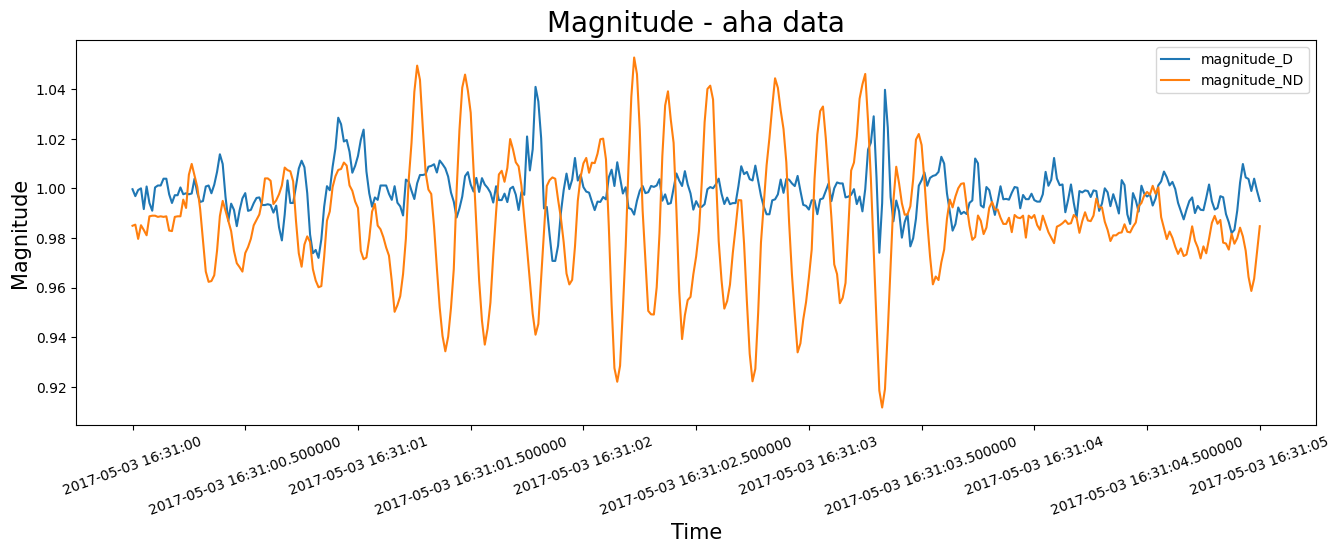

In [11]:
fig, axs = plt.subplots(figsize=(16, 5))

subsample = [0, 400]
aha_subsample = aha_df.loc[subsample[0] : subsample[1]]

plt.plot(aha_subsample.index, aha_subsample['magnitude_D'])
plt.plot(aha_subsample.index, aha_subsample['magnitude_ND'])
plt.legend(['magnitude_D', 'magnitude_ND'])
plt.title('Magnitude - aha data', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Magnitude', fontsize=15)

step = 40
labels_ind = [i for i in range(aha_subsample['datetime'].shape[0]) if i % step == 0]
labels = aha_subsample.loc[labels_ind]['datetime']
plt.xticks(ticks=np.arange(subsample[0], subsample[1] + 1, step=40), labels=labels)
plt.xticks(rotation=20)

In [12]:
# from ISPR course

def normalization_correlation_coefficient(ts1, ts2):
    # calculate square time series
    ts1 = np.square(ts1)
    ts2 = np.square(ts2)

    res = np.sum(ts1) * np.sum(ts2)
    return np.sqrt(res)

In [13]:
# cross correlation

cross_correlation_D = correlate(week_df['magnitude_D'], aha_df['magnitude_D'], "same")
cross_correlation_ND = correlate(week_df['magnitude_ND'], aha_df['magnitude_ND'], "same")

# normalize
cross_correlation_D = cross_correlation_D / normalization_correlation_coefficient(week_df['magnitude_D'], aha_df['magnitude_D'])
cross_correlation_ND = cross_correlation_ND / normalization_correlation_coefficient(week_df['magnitude_ND'], aha_df['magnitude_ND'])

In [14]:
cross_correlation_D_df = pd.DataFrame(cross_correlation_D, columns=['Correlation value'])
cross_correlation_D_df.describe()

,Correlation value
count,4.147200e+07
mean,4.711947e-02
std,1.115380e-03
min,2.329045e-02
25%,4.646389e-02
50%,4.722580e-02
75%,4.755833e-02
max,5.825925e-02


In [15]:
cross_correlation_ND_df = pd.DataFrame(cross_correlation_ND, columns=['Correlation value'])
cross_correlation_ND_df.describe()

,Correlation value
count,4.147200e+07
mean,4.781642e-02
std,9.949151e-04
min,2.343809e-02
25%,4.720800e-02
50%,4.804995e-02
75%,4.834347e-02
max,5.298364e-02


In [16]:
cross_correlation_D_df

,Correlation value
0,0.023290
1,0.023291
2,0.023292
3,0.023293
4,0.023293
...,...
41471995,0.023393
41471996,0.023392
41471997,0.023391
41471998,0.023390


(array([       0.,  5184000., 10368000., 15552000., 20736000.]),
 [Text(0.0, 0, '2017-05-04 00:00:00'),
  Text(5184000.0, 0, '2017-05-04 18:00:00'),
  Text(10368000.0, 0, '2017-05-05 12:00:00'),
  Text(15552000.0, 0, '2017-05-06 06:00:00'),
  Text(20736000.0, 0, '2017-05-07 00:00:00')])

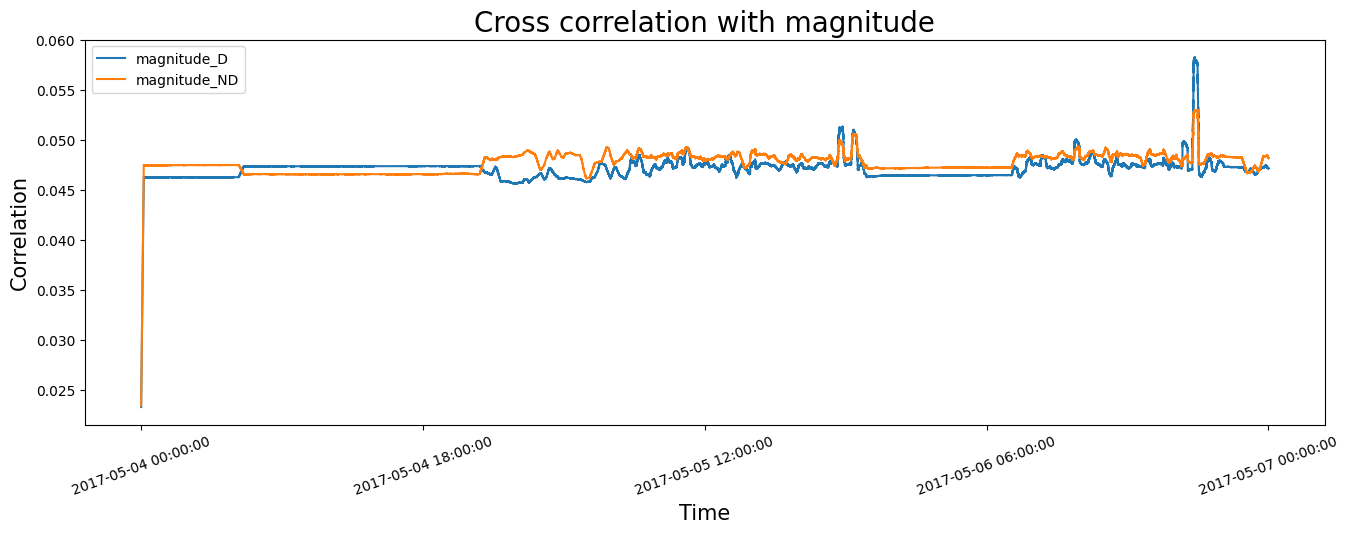

In [17]:
fig, axs = plt.subplots(figsize=(16, 5))

subsample = [0, (cross_correlation_D_df.shape[0]) / 2]
D_subsample = cross_correlation_D_df.loc[subsample[0] : subsample[1]]
ND_subsample = cross_correlation_ND_df.loc[subsample[0] : subsample[1]]

plt.plot(D_subsample.index, D_subsample)
plt.plot(ND_subsample.index, ND_subsample)
plt.legend(['magnitude_D', 'magnitude_ND'])
plt.title('Cross correlation with magnitude', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Correlation', fontsize=15)

step = 80 * 60 * 60 * 3 * 6
labels_ind = [i for i in range(cross_correlation_ND_df.loc[subsample[0] : subsample[1]].shape[0]) if i % step == 0]
labels = week_df.loc[labels_ind]['datetime']
plt.xticks(ticks=np.arange(subsample[0], subsample[1] + 1, step=step), labels=labels)
plt.xticks(rotation=20)

The normalized cross-correlation values are always near the 0, so we have strongly uncorrelated signals.